<a href="https://colab.research.google.com/github/javiervasquezufm/ELEMENTS-OF-MACHINE-LEARNING/blob/master/Ridge%26Lasso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicios aplicados: Selección de predictores (mejores subconjuntos y Lasso)

(Ejercicio 8 del capítulo 6 del libro:)



1.   Genera un predictor $X$ con $n=100$ observaciones aleatorias entre $[0,1]$. Genera también un vector de ruido $\epsilon$ con $n=100$ valores aleatorios
2.   Evalúa $Y=\beta_0+\beta_1X+\beta_2X^2+\beta_3X^3+\epsilon$ donde los $\beta$ son de tu elección (para ver un ejemplo de cómo generar datos de esta manera, ver: https://www.analyticsvidhya.com/blog/2017/06/a-comprehensive-guide-for-linear-ridge-and-lasso-regression/)
3.   Haz una selección de mejores subconjuntos (best subsets selection) y muestra cuál es el mejor modelo de acuerdo a $C_p$, BIC y $R^2$ ajustado
4.   Repite lo anterior ahora usando *forward stepwise selection* y también con *backward stepwise selection*.
5.   Ahora haz regressión Lasso y usa validación cruzada para encontrar el mejor $\lambda$ para los datos.
6.   Discute cómo se comparan los cuatro métodos usados



In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import itertools
from IPython.display import display, HTML
from sklearn import linear_model
from sklearn.model_selection import KFold
from ipywidgets import interact
import ipywidgets as widgets
import warnings
from ipywidgets import interact
import ipywidgets as widgets
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from scipy import stats
import itertools
import time
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.metrics import mean_squared_error


/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [0]:
np.random.seed(1)
x=np.random.normal(0,1,100)
eps=eps=np.random.normal(0,1,100)

In [0]:
y=2+2*x+3*(x**2)+2.5*(x**3)+eps

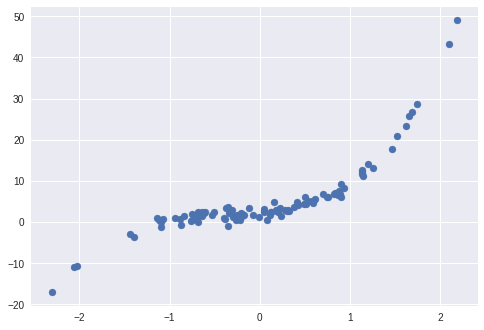

In [0]:
plt.scatter(x=x, y=y_np)

In [0]:
def fit_linear_reg(x,y):
    model_k = linear_model.LinearRegression(fit_intercept = True)
    model_k.fit(x,y)
    RSS = mean_squared_error(y,model_k.predict(x))*len(y)
    R_squared = model_k.score(x,y)
    return RSS, R_squared

In [0]:
k = 11

RSS_list, R_squared_list, feature_list = [],[], []
numb_features = []

from tqdm import tnrange, tqdm_notebook

for k in tnrange(1,len(x.columns) + 1, desc = 'Loop...'):

    for combo in itertools.combinations(x.columns,k):
        tmp_result = fit_linear_reg(x[list(combo)],y_np)    
        RSS_list.append(tmp_result[0])                  
        R_squared_list.append(tmp_result[1])
        feature_list.append(combo)
        numb_features.append(len(combo))

In [0]:
def get_models(k, X, y):
    X_combos = itertools.combinations(list(X.columns), k)
    models = []
    for X_label in X_combos:
        X_smf = ' + '.join(X_label)
        f     = '{} ~ {}'.format(y.columns[0], X_smf)
        model = smf.ols(formula=f, data=pd.concat([X, y], axis=1)).fit()
        models += [(f, model)]
    return models

def min_rss(statsmodels):
    return sorted(statsmodels, key=lambda tup: tup[1].ssr)[0]

def max_adjr2(statsmodels):
    return sorted(statsmodels, reverse=True, key=lambda tup: tup[1].rsquared_adj)[0]

def min_bic(statsmodels):
    return sorted(statsmodels, reverse=False, key=lambda tup: tup[1].bic)[0]

def min_aic(statsmodels):
    return sorted(statsmodels, reverse=False, key=lambda tup: tup[1].aic)[0]

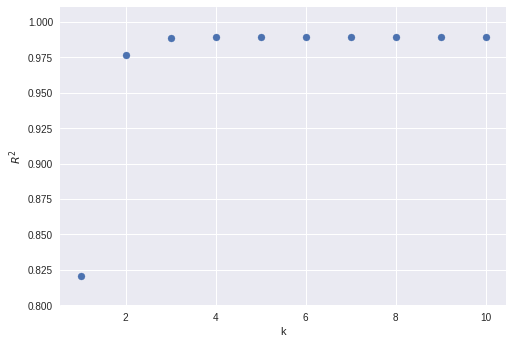

Model selected: 
Intercept    2.298519
X            2.659149
X10          0.001195
X2           2.617578
X5           2.279830
X7          -0.684882
X9           0.065720
dtype: float64


In [0]:
k = np.arange(1, len(X.columns)+1)

display(HTML('<h4>Adjusted R^2</h4>'))

adjr2 = [max_adjr2(m)[1].rsquared_adj for m in model_subsets]

plt.scatter(x=k, y=adjr2)
plt.xlabel('k')
plt.ylabel('$R^2$')
plt.show()

coefs_r2 = [(max_adjr2(m)[1].rsquared_adj, max_adjr2(m)[1].params) for m in model_subsets]
print('Model selected: \n{}'.format(max(coefs_r2)[1]))


# Nuevos conceptos

Lee las secciones 6.3 y 6.4 de *Introduction* para contestar los siguientes:

### Sección 6.3
1.   Explica a grandes rasgos en qué consiste la reducción de orden por PCR  
Por medio de la reduccion de orden por PCR, se esta asuminedo que la variacion que se tiene en X tendrá la misma direccion en la que esta asociada a Y
2.   PCR reduce la cantidad de predictores de r a M. A pesar de esto, ¿por qué no se considera a PCR como un método de selección de predictores?  
Porque  las observaciones son lo más cerca posible a las observaciones originales

3.   PCR es un método no supervisado mientras que PLS es supervisado. Explica por qué existe esta diferencia.  
El PCR es un modelo no supervisado porque se ajusta a sus observaciones y se genera informacion automatica por medio de ese metodo, como por el PLS lleva de por medio una intervencion para poder generar informacion. 

### Sección 6.4
1.   ¿Qué situaciones son de alta dimensión? ¿Qué problemas surgen en estas situaciones?

Los conjuntos de datos que contienen más características que observaciones a menudo se refieren
a tan alta dimensión. Y lo que puede suceder es que los calculos como lo son las regresiones lineales no casen bien con el numero de observaciones que tiene el modelo. 

2.   Entre todos los métodos para generar modelos, indica cuáles son apropiados en altas dimensiones y cuáles no, y por qué.


### De *Elements*
Lee la sección 3.4.3 de *Elements* para explicar la penalización *elastic-net* (la describen hasta el final de la sección)


